In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

In [2]:
def plot_learning_average(env_name, ax, experiment, window_size, var = True, OnePlayer = False):
    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models_TwoPlayer/' + env_name
    results = {}
        
    for exp in experiment:
        results[exp] = {}
        for seed in range(1):
            try:
                if(OnePlayer):
                    results[exp][seed] = np.load(base_dir + '/' + exp + '/alpha_0.0/' + str(seed) + '/results.npy')
                else:
                    results[exp][seed] = np.load(base_dir + '/' + exp + '/alpha_0.1/' + str(seed) + '/results.npy')   
            except IOError:
                print("No Files found")
            
    plot_learning_curves(results, ax, env_name, window_size, var, OnePlayer, best = False)

def plot_learning_best(env_name, seed, ax, experiment, window_size, var = True, OnePlayer = False):
    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models/' + env_name
    results = {}
        
    for i, exp in enumerate(experiment):
        results[exp] = {}
        try:
            if(OnePlayer):
                results[exp][seed] = np.load(base_dir + '/' + exp +'/alpha_0.0/' + str(seed) + '/results.npy')
            else:
                results[exp][seed] = np.load(base_dir + '/' + exp +'/alpha_0.1/' + str(seed) + '/results.npy')              
        except IOError:
            pass
            
    plot_learning_curves(results, ax, env_name, window_size, var, OnePlayer, best = True)

def plot_learning_curves(results, ax, env_name, window_size, var, OnePlayer, best):    
    colors = ['#396ab1', '#3e9651', '#cc2529', '#da7c30', '#94823d', '#535154', '#006400', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    idx = 0
    for exp in results:
        for seed in results[exp]:
            data = results[exp][seed]
            x = np.linspace(0, 5e3*(len(data)-1), len(data))
#             x = np.linspace(0, 1e6, 201)
            if 'RMSprop' in exp:
                l = 'GAD(RMSprop)'
            elif 'ExtraAdam' in exp:
                l = 'Extra-Adam'
            else:
                l = 'MixedNE-LD(RMSProp)' 
            ax.plot(x, data.tolist(), color = colors[idx], label = exp)
        idx += 1  
    
    ax.set_title(env_name)    
    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Reward')
    ax.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))    

In [3]:
def plot_learning_all(experiment, title, comparison, OnePlayer, best, seed=None):
    cols = 1
    rows = 1
    envs = ['HalfCheetah-v2']
    fill = [False]
    for f in fill:
        fig, axs = plt.subplots(rows, cols, figsize=(20*cols/3, 9*rows/2))
        for i, env in enumerate(envs):
            ax = axs
#             ax = axs.flatten()[i]
            if(comparison):
                exp = experiment[i]
            else:
                exp = experiment
            if(best):
                plot_learning_best(env, seed[i], ax, exp, window_size = 3000, var = f, OnePlayer = OnePlayer)
            else:
                plot_learning_average(env, ax, exp, window_size = 3000, var = f, OnePlayer = OnePlayer)
            if(comparison):
                ax.legend()
            else:
                if i == 0:
                    ax.legend()
        plt.tight_layout()
        
        if(OnePlayer):
            folder = 'OnePlayer'
        else:
            folder = 'TwoPlayer'
            
#         if(f):
#             if(best):
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_best_fill.pdf')
#             else:
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_average_fill.pdf')                    
#         else:
#             if(best):
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_best.pdf')
#             else:
#                 plt.savefig('plots/'+ folder + '/Learning_curve/' + title +'_average.pdf')

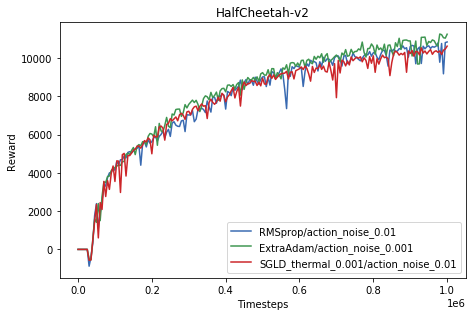

In [6]:
## Comparison One Player
HalfCheetah_exp = ['RMSprop/action_noise_0.01', 'ExtraAdam/action_noise_0.001', 'SGLD_thermal_0.001/action_noise_0.01']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

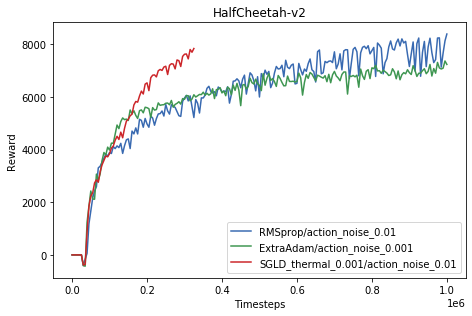

In [79]:
## Comparison Two Player
HalfCheetah_exp = ['RMSprop/action_noise_0.01', 'ExtraAdam/action_noise_0.001', 'SGLD_thermal_0.001/action_noise_0.01']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = False, best = False)

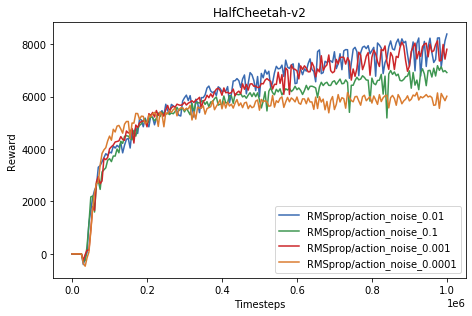

In [75]:
## Comparison Two Player RMSProp
HalfCheetah_exp = ['RMSprop/action_noise_0.01', 'RMSprop/action_noise_0.1', 'RMSprop/action_noise_0.001', 'RMSprop/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = False, best = False)

No Files found


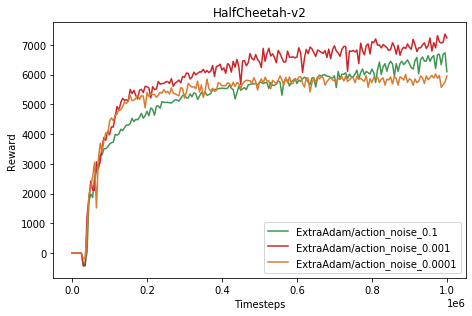

In [77]:
## Comparison Two Player ExtraAdam
HalfCheetah_exp = ['ExtraAdam/action_noise_0.01', 'ExtraAdam/action_noise_0.1', 'ExtraAdam/action_noise_0.001', 'ExtraAdam/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = False, best = False)

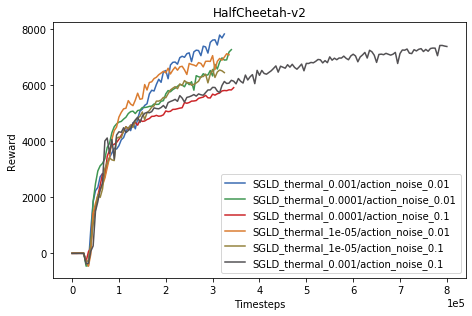

In [81]:
## Comparison Two Player SGLD
HalfCheetah_exp = ['SGLD_thermal_0.001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.1',\
                  'SGLD_thermal_1e-05/action_noise_0.01', 'SGLD_thermal_1e-05/action_noise_0.1', 'SGLD_thermal_0.001/action_noise_0.1']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = False, best = False)

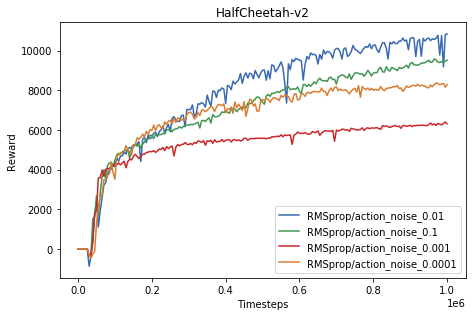

In [8]:
## Comparison One Player RMSProp
HalfCheetah_exp = ['RMSprop/action_noise_0.01', 'RMSprop/action_noise_0.1', 'RMSprop/action_noise_0.001', 'RMSprop/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

No Files found


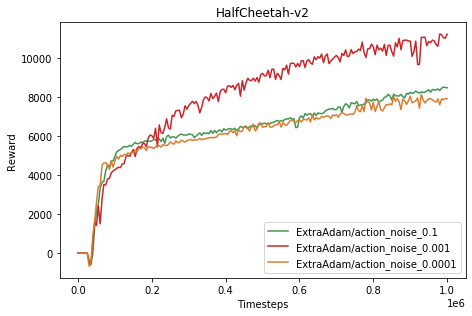

In [9]:
## Comparison One Player ExtraAdam
HalfCheetah_exp = ['ExtraAdam/action_noise_0.01', 'ExtraAdam/action_noise_0.1', 'ExtraAdam/action_noise_0.001', 'ExtraAdam/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

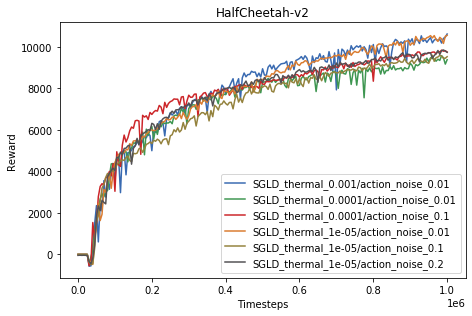

In [10]:
## Comparison One Player SGLD
HalfCheetah_exp = ['SGLD_thermal_0.001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.1',\
                  'SGLD_thermal_1e-05/action_noise_0.01', 'SGLD_thermal_1e-05/action_noise_0.1', 'SGLD_thermal_1e-05/action_noise_0.2']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

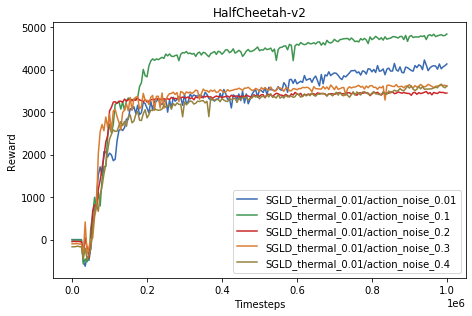

In [11]:
## Comparison One Player SGLD
HalfCheetah_exp = ['SGLD_thermal_0.01/action_noise_0.01', 'SGLD_thermal_0.01/action_noise_0.1', 'SGLD_thermal_0.01/action_noise_0.2',\
                  'SGLD_thermal_0.01/action_noise_0.3', 'SGLD_thermal_0.01/action_noise_0.4']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

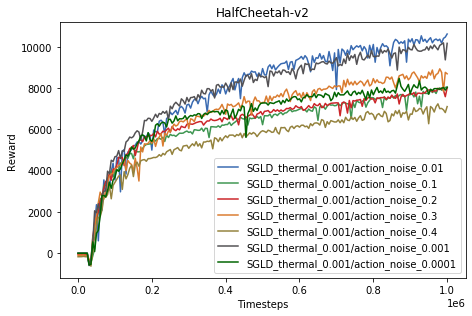

In [12]:
## Comparison One Player SGLD
HalfCheetah_exp = ['SGLD_thermal_0.001/action_noise_0.01', 'SGLD_thermal_0.001/action_noise_0.1', 'SGLD_thermal_0.001/action_noise_0.2',\
                  'SGLD_thermal_0.001/action_noise_0.3', 'SGLD_thermal_0.001/action_noise_0.4', 'SGLD_thermal_0.001/action_noise_0.001',\
                  'SGLD_thermal_0.001/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

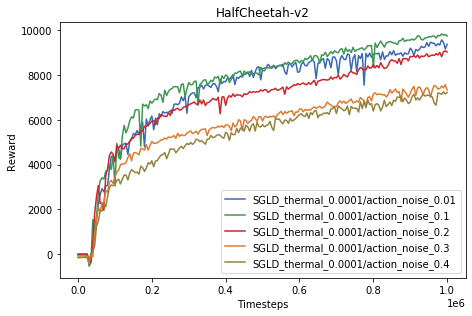

In [13]:
## Comparison One Player SGLD
HalfCheetah_exp = ['SGLD_thermal_0.0001/action_noise_0.01', 'SGLD_thermal_0.0001/action_noise_0.1', 'SGLD_thermal_0.0001/action_noise_0.2',\
                  'SGLD_thermal_0.0001/action_noise_0.3', 'SGLD_thermal_0.0001/action_noise_0.4']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

No Files found


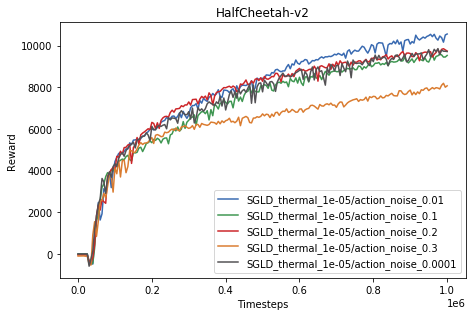

In [14]:
## Comparison One Player SGLD
HalfCheetah_exp = ['SGLD_thermal_1e-05/action_noise_0.01', 'SGLD_thermal_1e-05/action_noise_0.1', 'SGLD_thermal_1e-05/action_noise_0.2',\
                  'SGLD_thermal_1e-05/action_noise_0.3', 'SGLD_thermal_1e-05/action_noise_0.4''SGLD_thermal_1e-05/action_noise_0.001',\
                  'SGLD_thermal_1e-05/action_noise_0.0001']
exp = [HalfCheetah_exp]    
plot_learning_all(exp, 'Comparison', comparison = True, OnePlayer = True, best = False)

In [82]:
def plot_env(env_name, params, ax, var, OnePlayer, best, seed=None):

    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models_TwoPlayer/' + env_name
    results = {}
        
    for i, exp in enumerate(params):
        if(best):
            upper = seed[i] + 1
            lower = seed[i]
        else:
            upper = 1
            lower = 0
        results[exp] = {}
        for s in range(lower, upper):
            try:
                if(OnePlayer):
                    with open(base_dir + '/' + exp + '/alpha_0.0/' + str(s) + '/results_model', 'rb') as f:
                        results[exp][s] = pickle.load(f)
                else:
                    with open(base_dir + '/' + exp + '/alpha_0.1/' + str(s) + '/results_model', 'rb') as f:
                        results[exp][s] = pickle.load(f)                
            except IOError:
                pass         
            
    plot_model(results, ax, env_name, var, OnePlayer)

def plot_model(results, ax, env_name, var, OnePlayer):
    x = [i for i in range(21)]
    colors = ['#396ab1','#3e9651', '#cc2529', '#da7c30', '#94823d', '#535154', '#00FF00', '#800000', '#F08080', '#FFFF00', '#000000', '#C0C0C0']
    
    idx = 0
    for exp in results:
        if exp not in ['results_friction']:
            avg = []
            std = []
            for seed in results[exp]:
                avg_seed = []
                std_seed = []
                for mass in results[exp][seed]:
                    avg_seed.append(np.mean(results[exp][seed][mass]))
                    std_seed.append(np.std(results[exp][seed][mass]) / np.sqrt(len(results[exp][seed][mass]) - 1) * 2)
                avg.append(avg_seed)
                std.append(std_seed)
            avg = np.array(avg)
            std = np.array(std)
            avg = np.mean(avg, axis=0)
            std = np.mean(std, axis=0)
            
        if 'RMSprop' in exp:
            l = 'GAD (RMSprop)'
        elif 'ExtraAdam' in exp:
            l = 'Extra-Adam'
        else:
            l = 'MixedNE-LD (RMSProp)'                
        if(OnePlayer):
#             ax.plot(x, avg, label=l, color=colors[idx], linestyle="--")
            ax.plot(x, avg, color=colors[idx], linestyle="--")
        else:
#             l = r'$\beta=$'+ str(exp[45:48]) + r', $K_t$='+ str(exp[52:53])
#             ax.plot(x, avg, color=colors[idx], linestyle="-")
            ax.plot(x, avg, label=l, color=colors[idx], linestyle="-")
        if(var):
            ax.fill_between(x, np.array(avg) - np.array(std), np.array(avg) + np.array(std), facecolor=colors[idx], alpha=0.2, interpolate=True)
        idx += 1
    if(env_name == 'HalfCheetah-v2_0.5M'):
        env_name = 'HalfCheetah-v2'
    ax.set_title(env_name)         
    ax.set_xticks([0, 5, 10, 15, 20])
    ax.set_xticklabels([0.5, 0.75, 1.0, 1.5, 2.0])
    ax.set_xlabel('Relative Friction')
    ax.set_ylabel('Reward')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


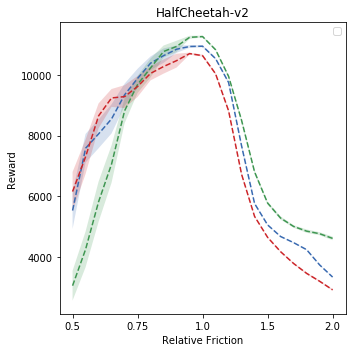

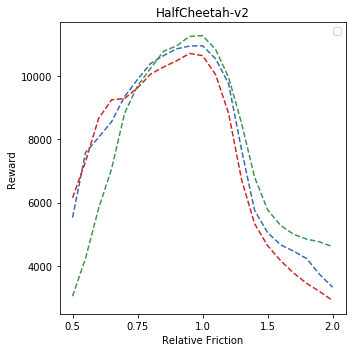

In [83]:
fill = [True, False]
best = False
for f in fill:
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    params = ['RMSprop/action_noise_0.01', 'ExtraAdam/action_noise_0.001', 'SGLD_thermal_0.001/action_noise_0.01']
#     seed = [3, 4, 2]
    plot_env(env_name='HalfCheetah-v2', params=params, ax=ax, var = f, OnePlayer = True, best = best) 

#     seed = [1, 0, 4]
#     params = ['RMSprop/action_noise_0.2', 'ExtraAdam/action_noise_0.01', 'SGLD_thermal_0.01/no_noise']
#     plot_env(env_name='HalfCheetah-v2', params=params, ax=ax, var = f, OnePlayer = False, best = best, seed = seed)
    ax.legend()
    plt.tight_layout()
#     path = 'plots/HalfCheetah/TwoPlayer/Friction_Uncertainty/'
#     if(f):
#         if(best):
#             plt.savefig(path +'best_fill.pdf')
#         else:
#             plt.savefig(path +'average_fill.pdf')                    
#     else:
#         if(best):
#             plt.savefig(path +'best.pdf')
#         else:
#             plt.savefig(path +'average.pdf')   

In [69]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_2d(env_name, params, OnePlayer, best, seed=None):
    if OnePlayer:
        base_dir = os.getcwd() + '/models_OnePlayer/' + env_name
    else:
        base_dir = os.getcwd() + '/models_TwoPlayer/' + env_name

    results = {}
    vmin = 10000
    vmax = -10000
    for idx, param in enumerate(params):
        if(best):
            upper = seed[idx] + 1
            lower = seed[idx]
        else:
            upper = 1
            lower = 0
        try:
            mat = np.zeros((11, 11))
            for s in range(lower, upper):
                if(OnePlayer):
                    with open(base_dir + '/' + param + '/alpha_0.0/' +str(s)+'/results_model_friction', 'rb') as f:
                        data = pickle.load(f)
                else:
                    with open(base_dir + '/' + param + '/alpha_0.1/'+str(s)+'/results_model_friction', 'rb') as f:
                        data = pickle.load(f)                  
                row = 0
                for key in data:
                    col = 0
                    for key2 in data[key]:
                        mat[row, col] += np.mean(data[key][key2])
                        col += 1
                    row += 1
            mat = mat
            results[param] = mat

            vmin = min(vmin, np.min(mat))
            vmax = max(vmax, np.max(mat))
        except:
            pass
    
    plt.figure(figsize=(10, 10))
    idx = 1
    for key in results:
        
        plt.subplot(1, 4, idx)
        idx += 1
        ax = plt.gca()
        im = ax.imshow(results[key], cmap='autumn', interpolation='nearest', vmin=vmin, vmax=vmax)
        x = [0, 2, 4, 6, 8, 10]
        #[0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
#         labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
        labels = [0.5, 0.7, 0.9, 1.2, 1.6, 2.0]
        plt.xticks(x, labels, fontsize=4)

        y = [0, 2, 4, 6, 8, 10]
        #[0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0]
        labels = [0.5, 0.7, 0.9, 1.2, 1.6, 2.0]
        plt.yticks(y, labels, fontsize=4)

#         plt.xlabel('Noise Probability', fontsize=5)
        plt.xlabel('Relative Mass', fontsize=5)
        plt.ylabel('Relative Friction', fontsize=5)
        if "RMSprop" in key:
            plt.title('GAD' + '/' + env_name, fontsize=6)
        elif "ExtraAdam" in key:
            plt.title('Extra-Adam' + '/' + env_name, fontsize=6)
        else:
            plt.title('MixedNE-LD' + '/' + env_name, fontsize=6)            
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.13)

        cbar = plt.colorbar(im, cax=cax)
        cbar.ax.tick_params(labelsize=4) 
    plt.tight_layout()
    plt.savefig(env_name +'_model_friction.pdf', bbox_inches='tight',pad_inches=0.0, dpi= 300)

    
#     if(OnePlayer):
#         folder = 'OnePlayer'
#     else:
#         folder = 'TwoPlayer'
    
#     if(best):
#         plt.savefig('plots/'+ folder + '/Heat_map/mass_friction/' + env_name +'_best.pdf', bbox_inches='tight',pad_inches=0.0, dpi= 300)
#     else:
#         plt.savefig('plots/'+ folder + '/Heat_map/mass_friction/' + env_name +'_average.pdf', bbox_inches='tight',pad_inches=0.0, dpi = 300) 

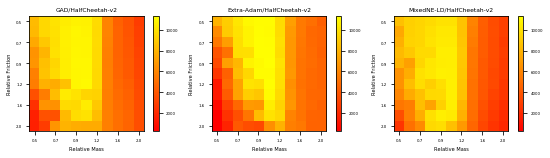

In [70]:
## Comparison Two Player Average
HalfCheetah_exp = ['RMSprop/action_noise_0.01', 'ExtraAdam/action_noise_0.001', 'SGLD_thermal_0.001/action_noise_0.01']
plot_2d('HalfCheetah-v2', HalfCheetah_exp, OnePlayer = True, best = False)